<a href="https://colab.research.google.com/github/inbalh1/ML/blob/main/Copy_of_HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)

## Part 1: Data Loading and First Look


## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
# (Q1)
dataset.shape

(2500, 28)

In [ ]:
# (Q2)
dataset.num_of_siblings.value_counts()

1.0    786
2.0    553
0.0    544
3.0    318
4.0    120
5.0     34
6.0      9
7.0      1
8.0      1
9.0      1
Name: num_of_siblings, dtype: int64

##Partitioning the data 


In [ ]:
# (Q5)
train, test = model_selection.train_test_split(dataset, test_size=0.2, random_state=29)

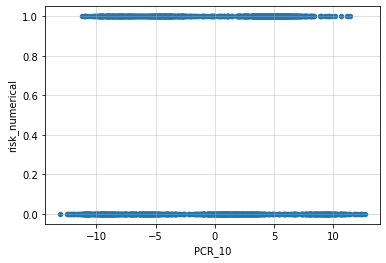

In [ ]:
train.plot(x='PCR_10', y='risk_numerical', kind='scatter') # plot with pandas
plt.grid(alpha=0.5)

In [ ]:
train['risk_numerical'] = train.risk.map({'High':1, 'Low':-1, np.nan:np.nan})


Correlation is: 0.093


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


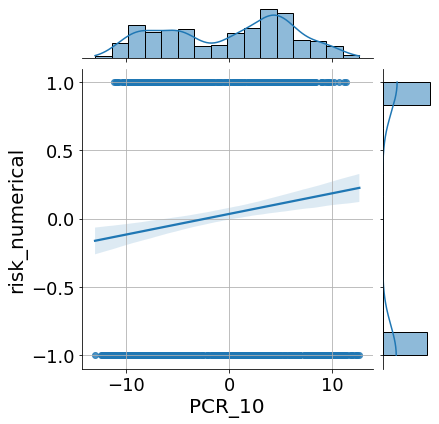

In [ ]:
x = train.PCR_10
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical.PCR_10))
g = sns.jointplot(train.PCR_10, train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()

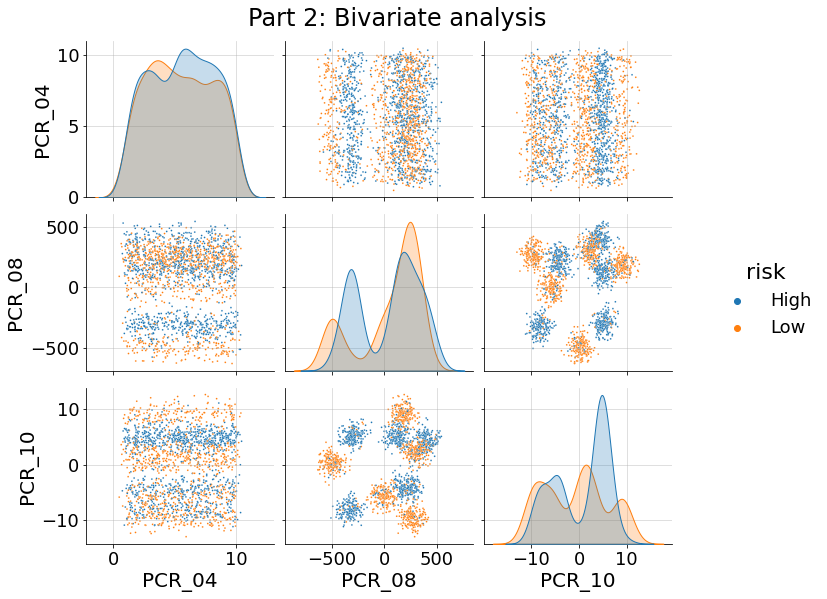

In [ ]:
# (Q7)
g=sns.pairplot(train[['PCR_04', 'PCR_08', 'PCR_10','risk']], hue='risk', plot_kws={"s": 3})
g.fig.suptitle("Part 2: Bivariate analysis", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

## k-NN implementation

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y
    return self

  def predict(self, X):
    # Note: You can use self.n_neighbors here
    # Compute the predicted labels (+1 or -1)
    distance = cdist(X, self.X)
    k = self.n_neighbors
    closest_k = np.argpartition(distance, k, axis=1)[:,:k]
    Y = np.ones([X.shape[0], 1]) * np.copy(self.y)
    tmp_res = Y[np.arange(Y.shape[0])[:,None], closest_k]
    predictions = np.sign(tmp_res.sum(axis=1))
    return predictions

In [ ]:
"""partial = train[['PCR_08', 'PCR_10']].copy()
x = partial.head(3)
distance = cdist(x, partial)
k = 2
closest_k = np.argpartition(distance, k, axis=1)[:,:k]
y = np.ones([x.shape[0], 1]) * np.copy(train.risk_numerical)
tmp_res = y[np.arange(y.shape[0])[:,None], closest_k]
np.sign(tmp_res.sum(axis=1))"""

In [ ]:
partial = train[['PCR_08', 'PCR_10']].copy()
def get_score_from_knn(k):
  h = kNN(k)
  h.fit(partial, train.risk_numerical)
  return h.score(partial, train.risk_numerical)
print(get_score_from_knn(1))
print(get_score_from_knn(9))

1.0
0.834


In [ ]:
def visualize_clf(clf, X, Y, title, marker_size=150,
                  grid_length=300):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["+", "*"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    #plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(range(n_classes), palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

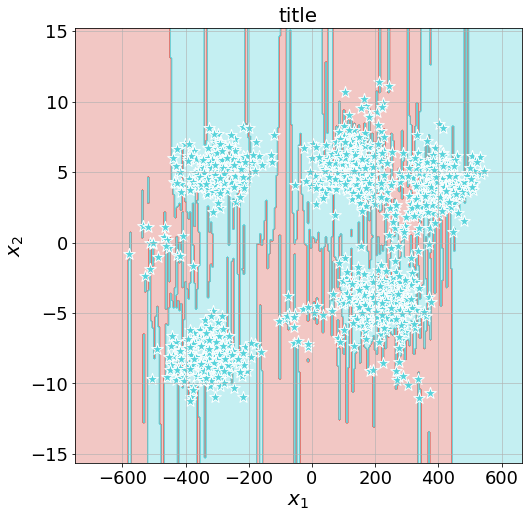

In [ ]:
h = kNN(1)
h.fit(partial, train.risk_numerical)
X = train.loc[:, ['PCR_08', 'PCR_10']].to_numpy()
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, X, y, "title")

# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath) 

In [ ]:
df = dataset

In [ ]:
df.dtypes


patient_id                 int64
age                      float64
sex                       object
weight                   float64
blood_type                object
address                   object
current_location          object
num_of_siblings          float64
happiness_score          float64
household_income         float64
conversations_per_day    float64
sugar_levels             float64
sport_activity           float64
symptoms                  object
pcr_date                  object
PCR_01                   float64
PCR_02                   float64
PCR_03                   float64
PCR_04                   float64
PCR_05                   float64
PCR_06                   float64
PCR_07                   float64
PCR_08                   float64
PCR_09                   float64
PCR_10                   float64
risk                      object
spread                    object
covid                       bool
dtype: object

In [ ]:
df.head()
df.sugar_levels.head()

0    72.0
1    82.0
2    76.0
3    72.0
4    97.0
Name: sugar_levels, dtype: float64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2500 non-null   int64  
 1   age                    2381 non-null   float64
 2   sex                    2364 non-null   object 
 3   weight                 2367 non-null   float64
 4   blood_type             2359 non-null   object 
 5   address                2372 non-null   object 
 6   current_location       2382 non-null   object 
 7   num_of_siblings        2367 non-null   float64
 8   happiness_score        2389 non-null   float64
 9   household_income       2374 non-null   float64
 10  conversations_per_day  2392 non-null   float64
 11  sugar_levels           2376 non-null   float64
 12  sport_activity         2367 non-null   float64
 13  symptoms               1490 non-null   object 
 14  pcr_date               2382 non-null   object 
 15  PCR_

In [ ]:
df.describe()

,patient_id,age,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10
count,2500.000000,2381.000000,2367.000000,2367.000000,2389.000000,2374.000000,2392.000000,2376.000000,2367.000000,2374.000000,2392.000000,2394.000000,2500.000000,2364.000000,2385.000000,2384.000000,2500.000000,2386.000000,2500.000000
mean,4007.751600,26.596808,56.952514,1.509928,6.945584,314.103151,3.516722,88.130471,1.238699,-0.028715,-0.006145,2.948204,5.533616,176.404966,177.557247,0.044754,47.028588,-7.540962,-0.194871
std,2297.317303,15.541716,21.776503,1.259204,1.475218,262.534208,2.899352,18.137737,1.096782,0.564384,0.570868,1.751792,2.629841,99.086902,104.989169,10.144631,297.335672,5.921984,6.207290
min,4.000000,3.000000,5.000000,0.000000,1.000000,1.000000,0.000000,40.000000,0.000000,-1.214815,-1.198200,0.000000,0.483812,-15.421751,-13.209828,-40.135782,-631.386211,-22.212634,-13.058805
25%,2037.750000,12.000000,40.800000,1.000000,6.000000,126.350000,1.000000,76.000000,0.000000,-0.453289,-0.440806,2.000000,3.261151,89.454266,83.653686,-6.965020,-255.925103,-11.955739,-5.769724
50%,4026.000000,26.000000,58.900000,1.000000,7.000000,246.130000,3.000000,89.000000,1.000000,-0.041253,-0.012019,3.000000,5.554198,174.394817,167.565046,0.007104,153.665127,-7.683597,1.101015
75%,5953.500000,40.000000,72.000000,2.000000,8.000000,423.780000,5.000000,100.000000,2.000000,0.418135,0.438873,4.000000,7.796558,261.873421,276.137943,6.853240,274.251721,-3.079536,4.766333
max,8000.000000,92.000000,129.300000,9.000000,9.000000,2593.560000,20.000000,159.000000,4.000000,1.225437,1.231782,9.000000,10.460432,369.575055,379.893012,36.614924,545.623699,9.134072,12.658549
